Problem statement on hirarchical clustering

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mtp
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Import dataset

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset=dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

### Cheking for null values

In [8]:
dataset.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
dataset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


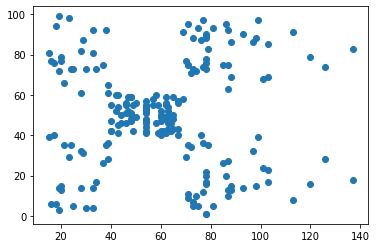

In [10]:
mtp.scatter(dataset[['Annual Income (k$)']],dataset[['Spending Score (1-100)']])

### Checking for outlier

<AxesSubplot:>

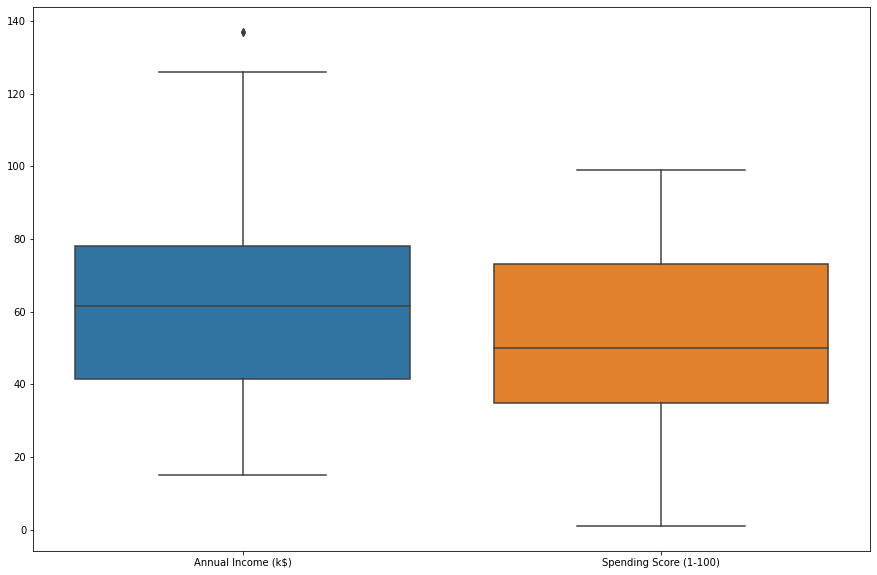

In [11]:
mtp.figure(figsize=(15,10))
sns.boxplot(data=dataset)

In [12]:
for i in dataset.columns:
    percentiles = dataset[i].quantile([0.25,0.75]).values
    dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]
    dataset[i][dataset[i] >= percentiles[1]] = percentiles[1]

C:\Users\yamin\AppData\Local\Temp\ipykernel_9580\3311194956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]


<AxesSubplot:>

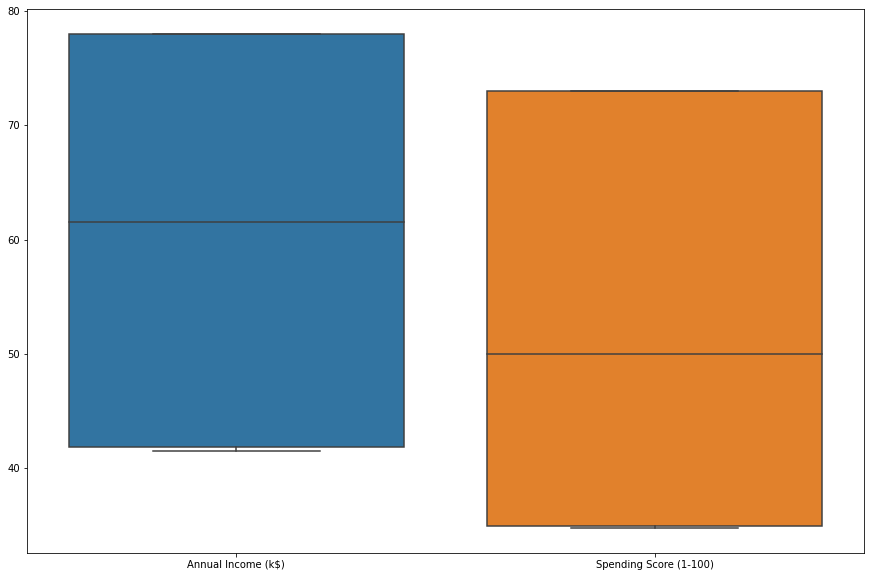

In [13]:
mtp.figure(figsize=(15,10))
sns.boxplot(data=dataset)

## Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

## Building a model

## Create dendogram 

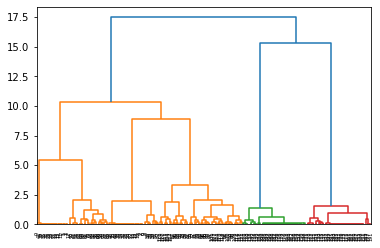

In [16]:
dendro=shc.dendrogram(shc.linkage(dataset,method='ward'))
mtp.show()

In [17]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred=hc.fit_predict(dataset)

In [18]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

## Data vitualization

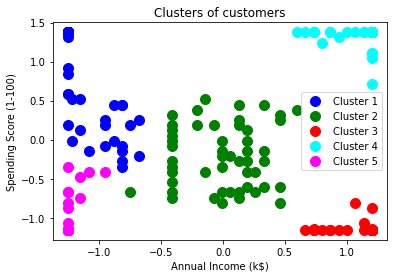

In [19]:
mtp.scatter(dataset[y_pred == 0, 0], dataset[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(dataset[y_pred == 1, 0], dataset[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(dataset[y_pred== 2, 0], dataset[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(dataset[y_pred == 3, 0], dataset[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(dataset[y_pred == 4, 0], dataset[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show() 